# **Contagion**
Model the state of the system represented by
>$\vec{x}(t)=\begin{bmatrix}S(t) \\ I(t) \\ R(t)\end{bmatrix},$

where $S(t)$, $I(t)$, and $R(t)$ represent the fractions of the population who are susceptible, infected, or recovered, respectively, at time $t$.

Additionally, assume that no one is born or dies from the disease, and a person can only be infected by the disease once. Thus,
>$0 \le S, I, R \le 1$ and $S+I+R=1.$

The state $\vec{x}$ evolves as an ODE, $D\vec{x}=\vec{f}(\vec{x})$, where
>$\vec{f}(\vec{x})=\begin{bmatrix} -\tau S(t)I(t) \\ \tau S(t)I(t) - \frac{I(t)}{\kappa} \\ \frac{I(t)}{\kappa} \end{bmatrix}.$

$\tau \ge 0$ measures how quickly the disease spreads (higher values corresponding to faster spread), while $\kappa > 0$ measures how long it takes an infected person to recover (higher values corresonding to longer recovery times).

First, initialize the environment, parameters, and initial conditions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

tau = 0.8
kappa = 4

s0 = 0.99
i0 = 0.01
r0 = 0

x0 = np.array([s0, i0, r0])

f"[S(0), I(0), R(0) = {x0}"

'[S(0), I(0), R(0) = [0.99 0.01 0.  ]'

Define differential equation,
>$\vec{f}(\vec{x})=\begin{bmatrix} -\tau S(t)I(t) \\ \tau S(t)I(t) - \frac{I(t)}{\kappa} \\ \frac{I(t)}{\kappa} \end{bmatrix}.$

In [2]:
def f(t, x, T, K):
  dx = np.zeros_like(x)
  dx[0] = -T * x[0] * x[1]
  dx[1] = (T * x[0] * x[1]) - (x[1] / K)
  dx[2] = x[1] / K
  return dx

Define stopping condition, terminating the simulation once $I(t)<10^{-4}$.

In [3]:
def terminate(t, x, T, K):
  return x[1] - 1e-4

terminate.terminal = True
terminate.direction = -1

Integrate.

In [4]:
simulated = solve_ivp(f, (0, 1000), x0, args=(tau, kappa), events=terminate, max_step = 0.1)

Graph and determine time $t$ at which stopping condition occurs.

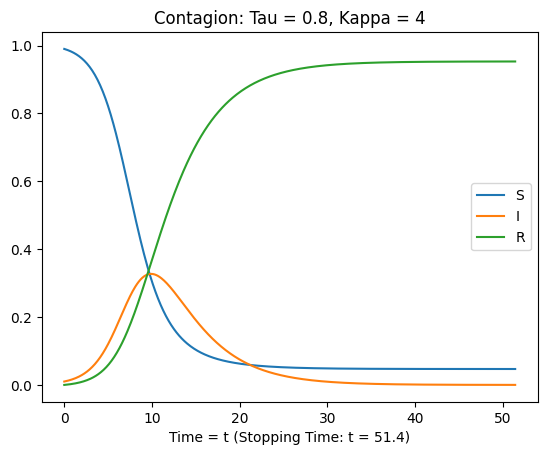

In [9]:
plt.plot(simulated.t, simulated.y[0], '-', label='S')
plt.plot(simulated.t, simulated.y[1], '-', label='I')
plt.plot(simulated.t, simulated.y[2], '-', label='R')
plt.title(f'Contagion: Tau = {tau}, Kappa = {kappa}')
plt.xlabel(f"Time = t (Stopping Time: t = {round(simulated.t[-1], 2)})")
plt.legend()

Define function that takes values of $\tau$ and $\kappa$ as inputs, and outputs the stopping time of the simulation.

In [6]:
def stoptime(T, K):
  simulated = solve_ivp(f, (0, 1000), x0, args=(T, K), events=terminate, max_step = 0.1)
  return simulated.t[-1]

Run function for combinations of values $\tau\in (0,4]$ and $\kappa\in [1,5]$.

In [7]:
taus = np.linspace(0.4, 4, 10)
kappas = np.linspace(1 ,5, 11)
z = np.zeros((kappas.size, taus.size))

for i in range(taus.size):
  for j in range(kappas.size):
    z[j,i] = stoptime(taus[i], kappas[j])

Graph contour map of stopping times based on values of $\tau$ and $\kappa$.

Text(0.5, 1.0, 'Stopping Times of Contagion Simulation')

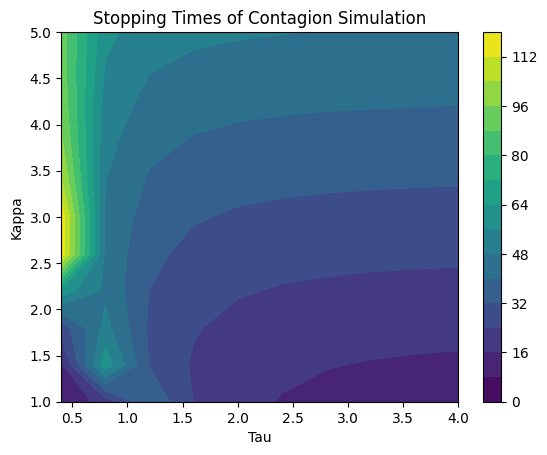

In [10]:
plt.contourf(taus, kappas, z, 15)
plt.colorbar()
plt.xlabel('Tau')
plt.ylabel('Kappa')
plt.title('Stopping Times of Contagion Simulation')